In [1]:
import pandas as pd

In [2]:
%matplotlib inline
from matplotlib import pyplot  # plotting

In [3]:
# Import the data from csv files into Pandas DataFrames
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [4]:
# See what the data looks like
print(train.shape, 'train: first column contains true label, 28x28 image') 
print(test.shape, '28x28 image')

(42000, 785) train: first column contains true label, 28x28 image
(28000, 784) 28x28 image


In [5]:
train.iloc[:, 1:].shape

(42000, 784)

In [6]:
# Normalization
train.iloc[:, 1:] = train.iloc[:, 1:].apply(lambda x: x / 255)
test = test.apply(lambda x: x / 255)

In [7]:
train.iloc[41990:41992,150:160]

,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158
41990,0.14902,0.439216,0.631373,0.866667,0.996078,0.960784,0.631373,0.200000,0.000000,0.0
41991,0.00000,0.000000,0.000000,0.000000,0.513725,0.996078,0.996078,0.823529,0.011765,0.0


this digit is 3


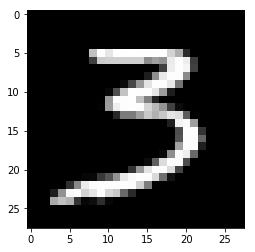

In [8]:
print("this digit is", train.iloc[25,0])
digit = train.iloc[25, 1:785].values.reshape(28,28)
pyplot.imshow(digit, cmap='gray')

In [9]:
# Get smaller subset
num_sample = 42000

train_small = train.iloc[:(num_sample-1000), :]
validation_small = train.iloc[(num_sample-1000):num_sample, :]

In [10]:
train_small.shape

(41000, 785)

In [11]:
validation_small.shape

(1000, 785)

In [12]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

In [13]:
print(torch.cuda.is_available())

False


In [14]:
# Hyper parameters
num_epochs = 5 #20
hidden_size = 50
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [15]:
train_image = train_small.iloc[:, 1:].values.reshape(-1, 1, 28, 28)
train_label = train_small.iloc[:, 0].values
print(train_image.shape)
print(train_label.shape)

(41000, 1, 28, 28)
(41000,)


In [16]:
t_image = torch.FloatTensor(train_image)
t_label = torch.LongTensor(train_label)
train_dataset = list(zip(t_image, t_label))
len(train_dataset)

41000

In [17]:
# validation_image = validation_small.iloc[:, 1:].values.reshape(-1, 1, 28, 28)
# validation_label = validation_small.iloc[:, 0].values
# print(validation_image.shape)
# print(validation_label.shape)

In [18]:
# v_image = torch.FloatTensor(validation_image)
# v_label = torch.LongTensor(validation_label)
# validation_dataset = list(zip(v_image, v_label))
# len(validation_dataset)

In [19]:
test_image = test.values.reshape(-1, 1, 28, 28)
test_dataset = torch.FloatTensor(test_image)

In [20]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True)

# validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,
#                                           batch_size=batch_size, 
#                                           shuffle=False)

In [21]:
len(test_dataset)

28000

In [22]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=len(test_dataset), 
                                          shuffle=False)

In [23]:
for images, labels in train_loader:
    print('images:', images.shape, '\nlabels:', labels.shape)
    print(images[1][0][6])
    print(labels[1])
    break

images: torch.Size([100, 1, 28, 28]) 
labels: torch.Size([100])
tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.])
tensor(7)


In [24]:
for images in test_loader:
    print('images:', images.shape)
    print(images[0][0][6])
    break

images: torch.Size([28000, 1, 28, 28])
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.2353,  0.8941,  0.9922,  0.9922,  0.9922,
         0.9922,  0.9922,  0.9922,  0.9922,  0.8118,  0.7725,  0.1804,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000])


In [28]:
class PytorchDeepConvNet2(nn.Module):
    def __init__(self, num_classes=10):
        super(PytorchDeepConvNet2, self).__init__()

        # Layer 1: conv - relu - conv- relu - pool
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))        
        
        # Layer 2: conv - relu - conv- relu - pool
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Layer 3: conv - relu - conv- relu - pool
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Fully Connected 1 (readout)
        # Affine - ReLU - Dropout - Affine - Dropout - Softmax
        self.layer4 = nn.Sequential(
            nn.Linear(64 * 4 * 4, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, num_classes),
            nn.Dropout(0.5))

        # Initialize all parameters using kaiming normalization
        self.init_weights_kaiming()
    
    def init_weights_kaiming(self):
        #Use kaiming normalization to initialize the parameters
        for layer in [self.layer1, self.layer2, self.layer3, self.layer4]:
            for m in layer:
                if type(m) == nn.Conv2d or type(m) == nn.Linear:
                    m.weight = nn.init.kaiming_normal_(m.weight)

    def forward(self, x):

        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        out = out.view(out.size(0), -1)
    
        # Linear function (readout)
        out = self.layer4(out)
        
        return out

In [29]:
model = PytorchDeepConvNet2(num_classes)
print(model)
criterion = nn.CrossEntropyLoss()
# Use Adam as the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

PytorchDeepConvNet2(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=1024, out_features=50, bias=True)
    (1): ReL

In [30]:
iter = 0
# accuracies = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images) # Now we dont need to resize like images.view(xx)
        labels = Variable(labels)
        
        # Clear gradients w.r.t parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: Softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t paramters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 50 == 0:
            # Print Loss
            print('Iteration: {}. Loss: {}.'.format(iter, loss.item()))

Iteration: 50. Loss: 2.0896081924438477.
Iteration: 100. Loss: 1.7662558555603027.
Iteration: 150. Loss: 1.764256238937378.
Iteration: 200. Loss: 1.7440763711929321.
Iteration: 250. Loss: 1.7460557222366333.
Iteration: 300. Loss: 1.6307404041290283.
Iteration: 350. Loss: 1.4814486503601074.
Iteration: 400. Loss: 1.3664772510528564.
Iteration: 450. Loss: 1.344333291053772.
Iteration: 500. Loss: 1.4874287843704224.
Iteration: 550. Loss: 1.1613502502441406.
Iteration: 600. Loss: 1.1734824180603027.
Iteration: 650. Loss: 1.0343904495239258.
Iteration: 700. Loss: 1.2027736902236938.
Iteration: 750. Loss: 1.1612176895141602.
Iteration: 800. Loss: 1.353973388671875.
Iteration: 850. Loss: 1.2040355205535889.
Iteration: 900. Loss: 1.2894091606140137.
Iteration: 950. Loss: 1.3093675374984741.
Iteration: 1000. Loss: 1.0049357414245605.
Iteration: 1050. Loss: 1.2651605606079102.
Iteration: 1100. Loss: 1.111684799194336.
Iteration: 1150. Loss: 1.313420057296753.
Iteration: 1200. Loss: 0.99486750364

In [31]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images in test_loader:
        images = Variable(images)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  

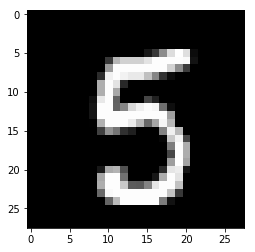

In [36]:
pyplot.imshow(images[10].reshape(28,28), cmap='gray')

In [37]:
predicted[10]

tensor(5)

In [38]:
predicted.shape

torch.Size([28000])

In [39]:
predicted.shape[0]

28000

In [40]:
result = pd.DataFrame({'Label': predicted.numpy(), 'ImageId': list(range(1, predicted.shape[0] + 1))})
result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
result.to_csv('prediction.csv',index=False)